In [21]:
import numpy as np # import for math and array operations
import pandas as pd # import for dataframe handle
import matplotlib.pyplot as plt # import for visual representation
import seaborn as sns # import for visual representation
import math
from bs4 import BeautifulSoup
import requests
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from unidecode import unidecode
import string
from sklearn.cluster import KMeans



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('clean_df.csv')

In [11]:
def clean (text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    lemmatizer = WordNetLemmatizer() 
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('English')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words]# Remove Stop Words
    lemmatized = [lemmatizer.lemmatize(word) for word in without_stopwords]
    
    return " ".join(lemmatized)

In [12]:
df['game_description']= df['game_description'].fillna('')
df['clean_des'] = df['game_description'].apply(clean)

In [13]:
df = df.drop(['game_description'],axis  =1)

In [31]:
# Tuned TFidfvectorizer
vec = TfidfVectorizer(min_df = 0.1, max_df = 0.7).fit(df.clean_des)

vectors = vec.transform(df.clean_des) # Transform text to vectors
sum_tfidf = vectors.sum(axis=0) # Sum of tfidf weighting by word
tfidf_list = [(word, sum_tfidf[0, idx]) for word, idx in     vec.vocabulary_.items()]  # Get the word and associated weight
#sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)  # Sort
#sorted_tfidf_list

In [32]:
X_proj = pd.DataFrame(vectors.toarray(), index=df.name.tolist())

km = KMeans(n_clusters=50)
km.fit(X_proj)

KMeans(n_clusters=50)

In [24]:
inertias = []
ks = range(1,100)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

In [26]:
len(inertias)

77

Text(0.5, 0, 'k cluster number')

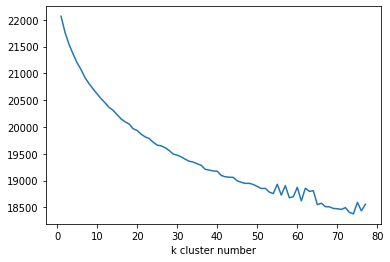

In [30]:
ks = range(1,78)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [34]:
labels = km.labels_
clustered_df = pd.DataFrame(data=labels, index=df.name.tolist(), columns = ['cluster'])

In [37]:
clustered_df

,cluster
DOOM,46
PLAYERUNKNOWN'S BATTLEGROUNDS,4
BATTLETECH,19
DayZ,48
EVE Online,18
...,...
Gamers Club,20
Gravia,14
Galactis,35
Alive,37


In [41]:
clustered_df[clustered_df['cluster'] == 46]

,cluster
DOOM,46
Call of Duty®: Black Ops,46
Titan Quest Anniversary Edition,46
Grand Theft Auto IV,46
Men of War: Assault Squad 2,46
...,...
GUILT,46
Quaver,46
Bullet Force,46
Good Company,46
